# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Abdee Ridho Pramono]
- **Email:** [m312b4ky0012@bangkit.academy]
- **ID Dicoding:** [abdeeridho]

## Menentukan Pertanyaan Bisnis

- Bagaimana performa pelanggan dalam satu tahun terakhir?
- Bagaimana persebaran pelanggan menurut pembagian waktu (pagi, siang, malam)?

## Import Semua Packages/Library yang Digunakan

In [ ]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Wrangling

### Gathering Data

**Mengumpulkan Tabel Data**

Data yang digunakan pada proyek ini adalah data penyewaan sepeda yang terdiri dari tanggal penyewaan, jam, hingga jumlah pelanggan baik yang belum terdaftar, sudah terdaftar, atau keduanya.

In [ ]:
# memuat data
hour_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- instant = indeks rekaman
- dteday = tanggal penyewaan
- seson = musim (1: musim semi, 2: musim panas, 3: musim gugur, 4: musim dingin)
- yr = tahun
- mnth = bulan
- holiday = hari libur (0: tidak, 1: iya)
- weekday = hari dalam seminggu (0: minggu, 1: senin, 2: selasa, dst)
- workingday = hari kerja (0: tidak, 1: iya)
- weathersit = cuaca (1: cerah/sedikit berawan, 2: berkabut, 3: hujan ringan, 4: hujan lebat)
- temp = suhu udara
- atemp = suhu "feels like"
- hum = kelembapan
- windspeed = kecepatan angin
- casual = pelanggan tidak terdaftar
- registered = pelanggan terdaftar
- cnt = total pelanggan

### Assessing Data

**Penilaian terhadap DataFrame hour_df untuk memeriksa missing value, duplicate, inaccurate value atau outlier**

Penilaian data frame dilakukan untuk menemukan kesalahan-kesalahan pada data sebelum dibersihkan yang nantinya akan digunakan pada proses eksplorasi data dan visualisasi data

In [ ]:
# memeriksa missing value
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
# memeriksa data duplikat
hour_df.duplicated().sum()

0

In [ ]:
# memeriksa inaccurate value
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


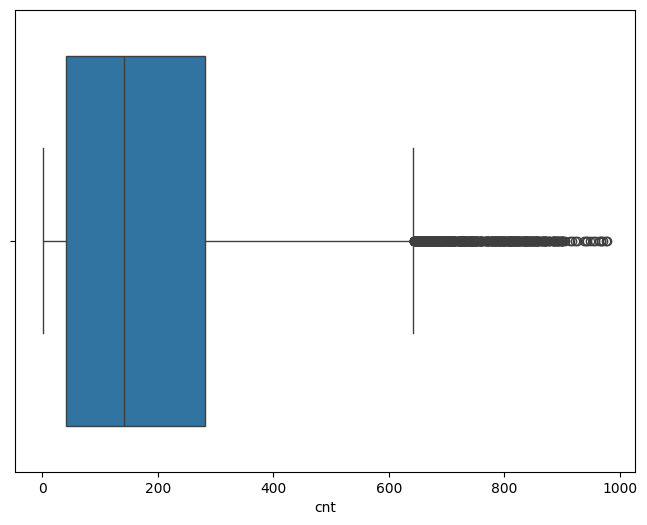

In [ ]:
# memeriksa outlier
plt.figure(figsize=(8, 6))
sns.boxplot(x=hour_df['cnt'])
plt.show()

**Insight:**
- Tidak ditemukan data yang hilang (missing value)
- Tidak ditemukan data yang terduplikat
- Tidak ditemukan data dengan nilai yang salah (inaccurate value)
- Ditemukan outlier yang merupakan titik data yang berada sangat jauh dari titik data yang lain

### Cleaning Data

Pembersihan data digunakan agar data dapat dieksplorasi secara maksimal sebelum dilakukan visualisasi data

In [ ]:
# menghitung Z-Score
z_scores = np.abs(stats.zscore(hour_df['cnt']))
threshold = 3
outliers = np.where(z_scores > threshold)

# menampilkan data yang merupakan outlier
hour_df.iloc[outliers]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
10383,10384,2012-03-13,1,1,3,18,0,2,1,1,0.70,0.6364,0.34,0.2985,96,638,734
10406,10407,2012-03-14,1,1,3,17,0,3,1,1,0.70,0.6364,0.28,0.0896,140,642,782
10407,10408,2012-03-14,1,1,3,18,0,3,1,1,0.70,0.6364,0.32,0.0000,102,647,749
10431,10432,2012-03-15,1,1,3,18,0,4,1,1,0.66,0.6212,0.44,0.2836,98,648,746
10527,10528,2012-03-19,1,1,3,18,0,1,1,1,0.64,0.6212,0.57,0.2537,120,681,801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15828,15829,2012-10-26,4,1,10,17,0,5,1,2,0.56,0.5303,0.76,0.1940,125,692,817
15848,15849,2012-10-27,4,1,10,13,0,6,0,1,0.60,0.6212,0.43,0.2537,310,450,760
15849,15850,2012-10-27,4,1,10,14,0,6,0,1,0.60,0.6212,0.46,0.2537,325,425,750
16726,16727,2012-12-04,4,1,12,17,0,2,1,1,0.52,0.5000,0.59,0.2239,43,700,743


In [ ]:
# membersihkan outlier
non_outliers = np.where(z_scores <= threshold)
hour_df = hour_df.iloc[non_outliers]
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Terdapat 144 baris data yang merupakan outlier
- Data frame sudah dibersihkan dan siap digunakan untuk proses eksplorasi data

## Exploratory Data Analysis (EDA)

Proses eksplorasi data berguna untuk mendapatkan informasi dari data yang sedang dianalisa serta mendapatkan jawaban dari pertanyaan bisnis

In [ ]:
# mengubah nilai di kolom dteday ke tanggal
hour_df.loc[:, 'dteday'] = pd.to_datetime(hour_df['dteday'])

In [ ]:
# menampilkan informasi pada data frame
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17135.00000,17135.000000,17135.000000,17135.000000,17135.000000,17135.000000,17135.000000,17135.000000,17135.000000,17135.000000,17135.000000,17135.000000,17135.000000,17135.000000,17135.000000,17135.000000
mean,8616.41033,2.494718,0.495477,6.522264,11.485848,0.029180,3.003793,0.678669,1.428246,0.494417,0.473547,0.628875,0.189893,34.818267,145.672250,180.490516
std,5011.06776,1.109381,0.499994,3.451943,6.931725,0.168316,2.013274,0.467001,0.640886,0.192284,0.171711,0.192907,0.122455,48.728987,135.894681,166.101082
min,1.00000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4284.50000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,33.000000,39.000000
50%,8568.00000,2.000000,0.000000,7.000000,11.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,16.000000,113.000000,139.000000
75%,12916.50000,3.000000,1.000000,10.000000,17.000000,0.000000,5.000000,1.000000,2.000000,0.640000,0.621200,0.790000,0.253700,47.000000,214.000000,273.000000
max,17379.00000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,712.000000,733.000000


**Insight:**
- Rata-rata jumlah penyewaan sepeda dalam satu jam adalah 180
- Pelanggan terdaftar melakukan penyewaan sepeda lebih banyak dibandingkan dengan pelanggan yang belum terdaftar dengan rata-rata 145 berbanding dengan 34

## Visualization & Explanatory Analysis

Visualisasi dan analisa explanatory berguna untuk menyampaikan informasi dari yang sudah didaptkan pada proses eksplorasi data untuk menjawab pertanyaan bisnis

### Pertanyaan 1: Bagaimana performa pelanggan dalam satu tahun terakhir?

    mnth     cnt
0      1  134933
1      2  151352
2      3  219380
3      4  259831
4      5  315668
5      6  327443
6      7  319079
7      8  314914
8      9  303060
9     10  282680
10    11  254831
11    12  209534


Text(0, 0.5, 'Jumlah Pelanggan')

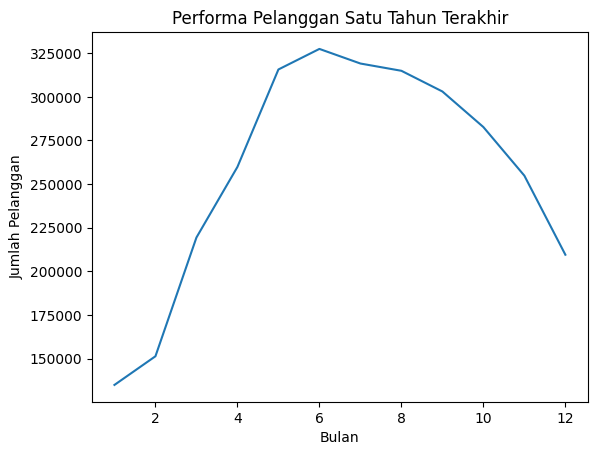

In [ ]:
# membuat tabel pivot yang berisi bulan serta jumlah penyewaan dalam satu bulan
year_perform = hour_df.groupby('mnth')['cnt'].sum().reset_index()
print(year_perform)

# menampilkan grafik
sns.lineplot(x='mnth', y='cnt', data=year_perform)
plt.title('Performa Pelanggan Satu Tahun Terakhir')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pelanggan')

### Pertanyaan 2: Bagaimana persebaran pelanggan menurut pembagian waktu (pagi, siang, malam)?

In [ ]:
# mengelompokkan pembagian waktu berdasarkan jam
# menggunakan teknik clustering dan binning
bins = [0, 6, 12, 16, 20, 24]
labels = ['Malam', 'Pagi', 'Siang', 'Sore', 'Malam']
hour_df['time'] = pd.cut(hour_df['hr'], bins=bins, labels=labels, right=False, ordered=False)
hour_df[['hr', 'time']].sample(10)

,hr,time
116,1,Malam
7765,4,Malam
16615,2,Malam
10404,15,Siang
12806,19,Sore
10464,3,Malam
9990,7,Pagi
13326,11,Pagi
6812,10,Pagi
12279,20,Malam


<ipython-input-14-9484647689c7>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  time_total = hour_df.groupby('time')['cnt'].mean().reset_index()


    time         cnt
0  Malam   77.359071
1   Pagi  202.995140
2  Siang  248.572215
3   Sore  344.612951


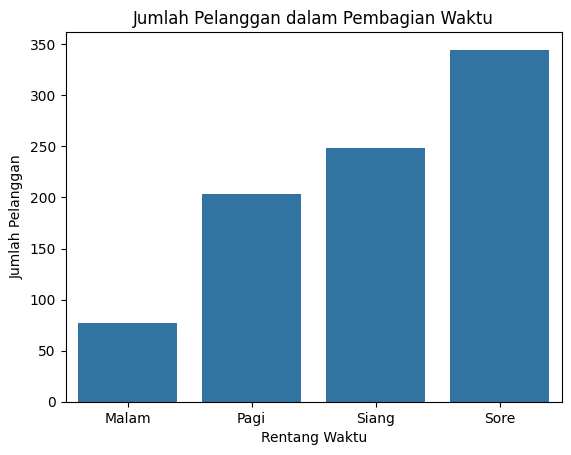

In [ ]:
# membuat tabel pivot yang berisi jumlah pelanggan dalam pembagian waktu
time_total = hour_df.groupby('time')['cnt'].mean().reset_index()
print(time_total)

# menampilkan grafik
sns.barplot(x='time', y='cnt', data=time_total)
plt.title('Jumlah Pelanggan dalam Pembagian Waktu')
plt.xlabel('Rentang Waktu')
plt.ylabel('Jumlah Pelanggan')
plt.show()

**Insight:**
- Jumlah penyewaan sepeda tertinggi terjadi pada bulan Juni sebesar 327443. Sementara itu jumlah penyewaan sepeda paling sedikit terjadi pada bulan Januari sebesar 134933
- Berdasarkan rentang pembagian waktu, sore hari merupakan waktu dengan jumlah pelanggan terbanyak dengan rata-rata 344 penyewaan dalam satu jam. Sementara itu malam hari merupakan waktu dengan jumlah pelanggan paling sedikit dengan rata-rata 77 peneyewaan dalam satu jam

## Analisis Lanjutan (Opsional)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time
0,1,2011-01-01 00:00:00,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,Malam
1,2,2011-01-01 00:00:00,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,Malam
2,3,2011-01-01 00:00:00,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,Malam
3,4,2011-01-01 00:00:00,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,Malam
4,5,2011-01-01 00:00:00,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,Malam


## Conclusion

- Performa pelanggan dalam satu tahun terakhir menunjukkan peningkatan jumlah pelanggan pada pertengahan tahun. Hal ini dapat dipengaruhi oleh faktor musim dimana pada pertengahan tahun terjadi musim panas sehingga sebagian besar orang akan menghabiskan waktu di luar rumah. Sementara itu, pada awal dan akhir tahun terjadi musim dingin sehingga sebagaian besar orang akan menghabiskan waktu di dalam rumah
- Persebaran pelanggan pada rentang pembagian waktu menunjukkan bahwa pelanggan lebih sering melakukan penyewaan pada waktu sore hari. Hal ini dapat dipengaruhi oleh faktor suhu, cuaca dan kelembapan udara. Biasanya, waktu sore memiliki suhu yang hangat sehingga cocok untuk melakukan kegiatan di luar rumah

In [ ]:
hour_df.to_csv("main_data.csv", index=False)